In [92]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import missingno as msno
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

sns.set()

In [16]:
census = pd.read_csv('acs2015_county_data.csv')

In [17]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.8,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,1.2,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.3,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.6,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9


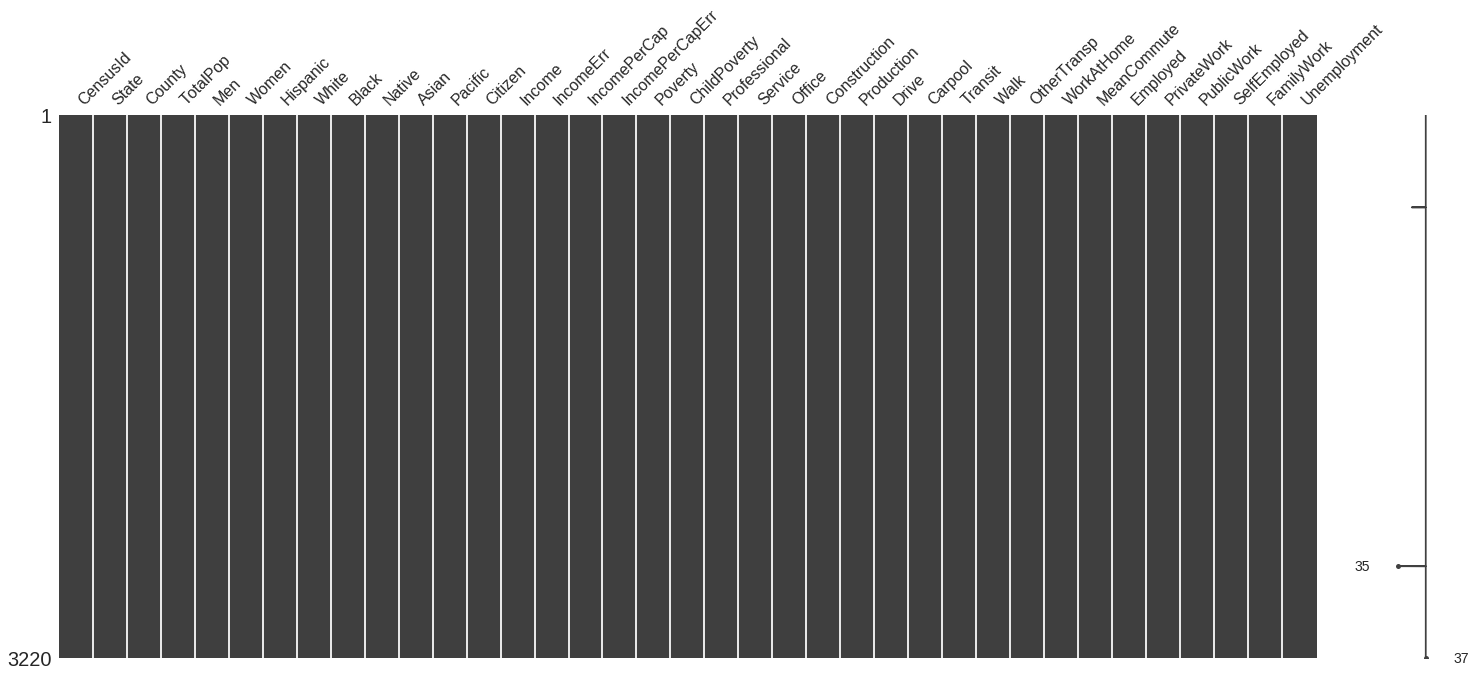

In [18]:
msno.matrix(census)

In [57]:
census['PercentMen'] = 100 * census['Men'] / census_subset['TotalPop']
census['PercentWomen'] = 100 * census['Women'] / census_subset['TotalPop']
census['PercentCitizen'] = 100 * census['Citizen'] / census_subset['TotalPop']
census['PercentNotCitizen'] = 100 - census['PercentCitizen']

0        7.6
1        7.5
2       17.6
3        8.3
4        7.7
5       18.0
6       10.9
7       12.3
8        8.9
9        7.9
10       9.1
11      13.6
12      19.4
13       9.4
14       8.3
15       7.1
16       9.0
17      22.6
18      17.0
19      11.2
20       9.7
21       7.3
22      10.9
23      16.4
24       7.7
25       8.3
26      15.6
27       9.0
28      10.0
29       9.8
        ... 
3190    27.9
3191    22.9
3192    23.0
3193    24.7
3194    10.9
3195    21.9
3196    31.2
3197    27.5
3198    26.1
3199    20.0
3200    16.1
3201    17.6
3202    23.9
3203    24.3
3204    12.1
3205     6.8
3206    15.8
3207    15.8
3208    29.4
3209    12.2
3210    15.7
3211    19.0
3212     7.9
3213    28.8
3214    21.7
3215    15.2
3216    12.2
3217    25.9
3218    24.3
3219    27.1
Name: Unemployment, Length: 3220, dtype: float64

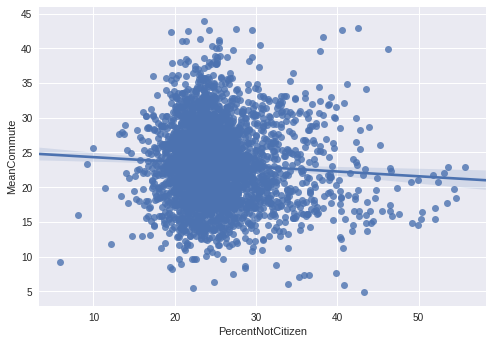

In [77]:
sns.regplot(x='PercentNotCitizen', y='MeanCommute', data=census)

In [98]:
#Mean Commute vs. Unemployment - Positive Correlation
#Mean Commute vs. Poverty - Positive Correlation
#Mean Commute vs. Income Per Cap - Negative Correlation
#Black vs. MeanCommute - Positive Correlation
#White vs. MeanCommute - Negative Correlation

state_2 = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

census['State Abbrev'] = census['State'].map(state_2)

states = census['State Abbrev']
unemployment = census['Unemployment']

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = states,
        z = unemployment.astype('float'),
        locationmode = 'USA-states',
        text = states,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Unemployed")
        ) ]

layout = dict(
        title = 'Unemployment Rate by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='us-map' )

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
3190    NaN
3191    NaN
3192    NaN
3193    NaN
3194    NaN
3195    NaN
3196    NaN
3197    NaN
3198    NaN
3199    NaN
3200    NaN
3201    NaN
3202    NaN
3203    NaN
3204    NaN
3205    NaN
3206    NaN
3207    NaN
3208    NaN
3209    NaN
3210    NaN
3211    NaN
3212    NaN
3213    NaN
3214    NaN
3215    NaN
3216    NaN
3217    NaN
3218    NaN
3219    NaN
Name: State Abbrev, Length: 3220, dtype: object